In [6]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

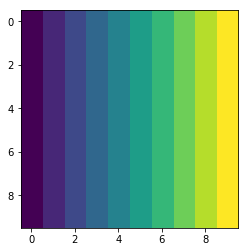

In [15]:
x = np.zeros((10, 10))
for i in range(10):
    x[:, i] = i
plt.imshow(x)

In [32]:
class RecurrentProp(nn.Module):

    def __init__(self, input_size, hidden_size):
        super(RecurrentProp, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.conv1x1a = nn.Conv2d(input_size, hidden_size, kernel_size=1, bias=False)
        self.conv1x1b = nn.Conv2d(hidden_size, input_size, kernel_size=1, bias=False)
        self.weight = torch.nn.Parameter(torch.eye(self.hidden_size))

    def forward(self, x):
        N, C, H, W = x.shape
        assert C == self.input_size, "%d vs %d" % (C, self.input_size)
        self.hidden = self.conv1x1a(x)
        output = self.hidden
        previous = torch.zeros((self.hidden_size))
        for n in range(N):
            for y in range(H):
                for x in range(1, W):
                    output[n, :, y, x] = torch.mm(output[n, :, y, x-1].view(1, -1), self.weight) +\
                    output[n, :, y, x]
        return output

In [33]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.recurrent = RecurrentProp(input_size=5, hidden_size=5)
    def foward(self, x):
        return self.recurrent(x)

In [34]:
model = RecurrentProp(input_size=1, hidden_size=1)

x = torch.ones((1, 1, 5, 5))
output = model(x)

In [35]:
output

tensor([[[[0.9899, 1.9798, 2.9697, 3.9596, 4.9495],
          [0.9899, 1.9798, 2.9697, 3.9596, 4.9495],
          [0.9899, 1.9798, 2.9697, 3.9596, 4.9495],
          [0.9899, 1.9798, 2.9697, 3.9596, 4.9495],
          [0.9899, 1.9798, 2.9697, 3.9596, 4.9495]]]], grad_fn=<CopySlices>)